In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
model.coef_

array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
       [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
       [-1.70752515, -1.53426834,  2.47097168,  2.55538211]])

SyntaxError: invalid syntax (<ipython-input-9-fc973306f58c>, line 1)

In [10]:
coeffs = pd.DataFrame(model.coef_, columns = iris.feature_names, index =iris.target_names)
coeffs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.414988,1.461297,-2.262141,-1.029095
versicolor,0.416640,-1.600833,0.577658,-1.385538
virginica,-1.707525,-1.534268,2.470972,2.555382


In [11]:
from sklearn.preprocessing import StandardScaler
X_norm =  StandardScaler().fit_transform(X)

model.fit(X_norm, y)

coeffs = pd.DataFrame(model.coef_, columns = iris.feature_names, index =iris.target_names)
coeffs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-0.810166,1.393699,-1.687386,-1.518991
versicolor,0.130380,-1.246338,0.789195,-0.889440
virginica,0.012990,-0.144535,1.863173,2.698873


In [12]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
model2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

model2.fit(X_norm, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
model3 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model3.fit(X_norm, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:

from sklearn import cross_validation

print("first model CV:",cross_validation.cross_val_score(model, X_norm, y, cv=10).mean(), "ridge model CV:", cross_validation.cross_val_score(model2, X_norm, y, cv=10).mean(), "lasso model CV:", cross_validation.cross_val_score(model3, X_norm, y, cv=10).mean())

('first model CV:', 0.90666666666666662, 'ridge model CV:', 0.90666666666666662, 'lasso model CV:', 0.94000000000000006)


In [24]:
model2.coef_

array([[-0.81016631,  1.39369878, -1.68738578, -1.51899135],
       [ 0.13037985, -1.2463382 ,  0.78919477, -0.88943988],
       [ 0.01299039, -0.1445346 ,  1.86317337,  2.69887272]])

In [25]:
model3.coef_

array([[ 0.        ,  1.19785607, -4.42820477,  0.        ],
       [ 0.02952304, -1.23973312,  0.76263594, -0.76951682],
       [ 0.        , -0.48059978,  2.71489775,  4.58095358]])

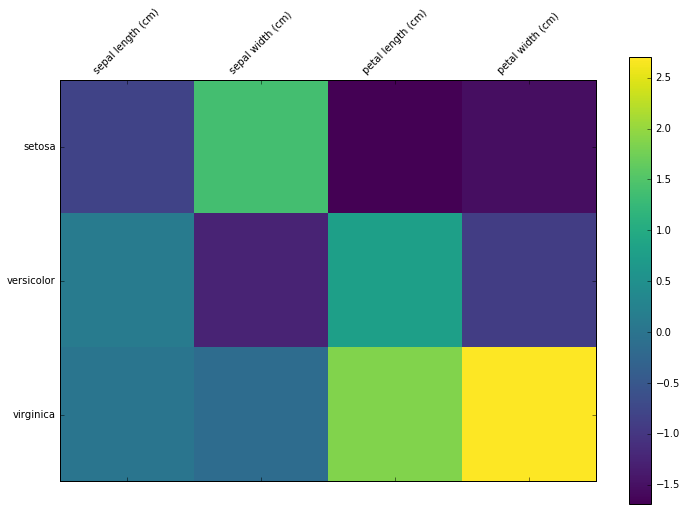

In [37]:
# first import matplotlib
% matplotlib inline
import matplotlib.pyplot as plt

# then create a figure and a plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(coeffs, cmap='viridis')

fig.colorbar(cax)

ax.set_xticklabels(['']+list(coeffs.columns), rotation =45);
ax.set_yticklabels(['']+list(coeffs.index));


# display the matrix
